Input Size: 1000 - Execution Time: 0.028431 seconds
Input Size: 5000 - Execution Time: 0.140993 seconds
Input Size: 10000 - Execution Time: 0.298599 seconds
Input Size: 50000 - Execution Time: 1.433062 seconds
Input Size: 100000 - Execution Time: 3.052788 seconds


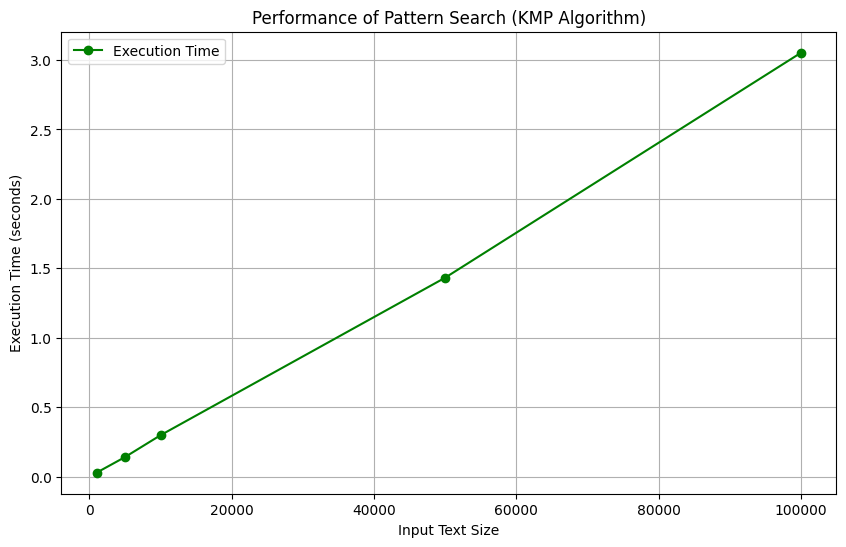

In [6]:
import time
import matplotlib.pyplot as plt

class PatternSearcher:
    def find_pattern(self, pattern, text):
        """Find all occurrences of the pattern in the given text using the KMP algorithm."""
        pattern_length = len(pattern)
        text_length = len(text)
        prefix_array = [0] * pattern_length  # Array to store the longest prefix suffix values
        pattern_pointer = 0  # Pointer for the pattern

        # Preprocess the pattern to compute the prefix array
        self.compute_prefix_array(pattern, pattern_length, prefix_array)

        text_pointer = 0  # Pointer for the text
        match_positions = []  # List to store positions of pattern matches

        while (text_length - text_pointer) >= (pattern_length - pattern_pointer):  # Ensure remaining text is sufficient
            if pattern[pattern_pointer] == text[text_pointer]:
                pattern_pointer += 1
                text_pointer += 1

            if pattern_pointer == pattern_length:
                match_positions.append(text_pointer - pattern_pointer)  # Save the starting index of the match
                pattern_pointer = prefix_array[pattern_pointer - 1]  # Reset pointer using the prefix array
            elif text_pointer < text_length and pattern[pattern_pointer] != text[text_pointer]:
                if pattern_pointer != 0:
                    pattern_pointer = prefix_array[pattern_pointer - 1]  # Use prefix array to skip comparisons
                else:
                    text_pointer += 1
        return match_positions

    def compute_prefix_array(self, pattern, pattern_length, prefix_array):
        """Compute the prefix array for the given pattern."""
        previous_length = 0  # Length of the previous longest prefix suffix
        prefix_array[0] = 0  # The first value of the prefix array is always 0
        current_index = 1

        while current_index < pattern_length:
            if pattern[current_index] == pattern[previous_length]:
                previous_length += 1
                prefix_array[current_index] = previous_length
                current_index += 1
            else:
                if previous_length != 0:
                    previous_length = prefix_array[previous_length - 1]
                else:
                    prefix_array[current_index] = 0
                    current_index += 1


# Benchmark and plot results for the KMP algorithm
if __name__ == "__main__":
    target_pattern = "search"
    input_sizes = [1000, 5000, 10000, 50000, 100000]  # Different input sizes
    execution_times = []

    for size in input_sizes:
        # Updated text with similar meaning
        sample_text = "searching for the right phrase to match and testing for repeated words like search" * size

        searcher = PatternSearcher()
        start_time = time.time()
        searcher.find_pattern(target_pattern, sample_text)
        end_time = time.time()

        execution_times.append(end_time - start_time)

    # Display benchmark results
    for size, time_taken in zip(input_sizes, execution_times):
        print(f"Input Size: {size} - Execution Time: {time_taken:.6f} seconds")

    # Plot the performance graph
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, execution_times, marker='o', linestyle='-', color='green', label='Execution Time')
    plt.title('Performance of Pattern Search (KMP Algorithm)')
    plt.xlabel('Input Text Size')
    plt.ylabel('Execution Time (seconds)')
    plt.grid()
    plt.legend()
    plt.show()